In [54]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd
from src.PLS.ABC import ABC_rejection
from src.PLS.utils import threshold_scheduler
from src.PLS.utils import beta_sampler
from src.PLS.utils import sims_graphs
from matplotlib.lines import Line2D

In [55]:
Typ = ["simple", "simple_I0", "meta"][0]
sizes = ["1000", "100", "10"]
seed = 1912
sim_scen = ["", "c1", "c2", "c3"][0]
beta_controls = [0]
n_runs = 5000

In [56]:
reference = [5]
trajs = 1
iterations = 18
meta_iterations = 900

In [57]:
#for i in range(len(beta_controls)):
plot_dict = {}
plot_dict["Runs"] = []
plot_dict["T"] = []
lower_dict = {}
lower_dict["Runs"] = []
upper_dict = {}
upper_dict["Runs"] = []
for siz in sizes:
    #import distributions
    distro = np.genfromtxt(f"../../../Data/R0_3/Sims_SIR/Sampled_distros/Distro_{Typ}_{siz}.csv", delimiter=",")[
         0:n_runs]
    output_dictionary = sims_graphs(distro, Typ, siz, seed, sim_scen, beta_controls[:],ext=True)
    for i in range(0, 1):
        plot_dict["Runs"].append(np.mean(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]), axis=0))
        lower_dict["Runs"].append(np.percentile(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]),5, axis=0))
        upper_dict["Runs"].append(np.percentile(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]),95, axis=0))
        plot_dict["T"].append(np.mean(output_dictionary["T"][i:i + n_runs]))

In [58]:
simple_fittings = {}
simple_fittings["1000"] = {}
simple_fittings["100"] = {}
simple_fittings["10"] = {}
I0_fittings = {}
I0_fittings["1000"] = {}
I0_fittings["100"] = {}
I0_fittings["10"] = {}
meta_fittings = {}
meta_fittings["1000"] = {}
meta_fittings["100"] = {}
meta_fittings["10"] = {}

In [59]:
for siz in sizes:
    if Typ == "simple":
        if siz == "1000":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                simple_fittings["1000"][f"{i}"] = total_traj
        elif siz == "100":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_1_100b.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                simple_fittings["100"][f"{i}"] = total_traj
        elif siz == "10":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_1_10b.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                simple_fittings["10"][f"{i}"] = total_traj
    elif Typ == "simple_I0":
        if siz == "1000":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b__I1.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b__I1.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                I0_fittings["1000"][f"{i}"] = total_traj
        elif siz == "100":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_1_100b_I1.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b_I1.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                I0_fittings["100"][f"{i}"] = total_traj
        elif siz == "10":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_1_10b_I1.csv",delimiter=",")
                print(".",end="")
                for j in range(2,iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b_I1.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                I0_fittings["10"][f"{i}"] = total_traj
    elif Typ == "meta":
        if siz == "1000":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_meta_{i}_1_1000b.csv",delimiter=",")
                print(".",end="")
                for j in range(2,meta_iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_meta_{i}_{j}_1000b.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)

        elif siz == "100":
            for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_meta_{i}_1_100b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,meta_iterations +1):
                        try:
                            temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_meta_{i}_{j}_100b.csv",delimiter=",")
                            total_traj = np.append(temp,total_traj,axis=0)
                            meta_fittings["100"][f"{i}"] = total_traj
                        except:
                            print(f"{j} is missing!")
        elif siz == "10":
            for i in range(1,trajs+1):
                total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_meta_{i}_1_10b.csv",delimiter=",")
                print(".",end="")
                for j in range(2,meta_iterations +1):
                    temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_meta_{i}_{j}_10b.csv",delimiter=",")
                    total_traj = np.append(temp,total_traj,axis=0)
                meta_fittings["10"][f"{i}"] = total_traj

...

In [60]:
if Typ != "meta":

    import numpy as np
    from src.PLS.metaSIR import meta_no_ext_sir
    from src.PLS.metaSIR import meta_timed_sir
    from decimal import Decimal, ROUND_UP
    from src.PLS.utils import basic_kernel
    from src.PLS.utils import basic_square_map
    from src.PLS.utils import straight_line_distances
    from src.PLS.ODE_tools import run_meta_model

    #ODEs
    N = 4
    tim = np.arange(0, 20 + 0.2, 0.2)
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    y0 = [999, 1, 0, 1000, 0, 0, 1000, 0, 0, 1000, 0, 0]
    meta_out = run_meta_model(5 / 1000, 1, y0, 20, False, basic_kernel, test_distances).y

    #Reality
    import numpy as np
    from src.PLS.baseSIR import no_ext_sir
    from src.PLS.baseSIR import real_sir
    from src.PLS.baseSIR import real_sir_times
    from src.PLS.baseSIR import timed_sir
    from decimal import Decimal, ROUND_UP
    import time
    from src.PLS.ABC import ABC_core
    from src.PLS.ABC import sum_sqrt_sq_distance
    import os

    distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf"]
    dis = distance_measure_array[1]
    if Typ == "simple":
        I0 = ["","_I1"][0]
    elif Typ == "simple_I0":
        I0 = ["","_I1"][1]

    seed = 1

    if I0 == "":
        X0 = [900, 100, 0]
    elif I0 == "_I1":
        X0 = [999,1,0]

    gamma = 1
    beta = 3
    mu = 0
    tstep = 0.05
    test_time = 100
    rng = np.random.default_rng(seed)
    tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
    rng = np.random.default_rng(seed)
    start_time = time.time()
    reality_1 = no_ext_sir(X0, mu, beta, gamma, tmax, tstep, rng)
    print(f"Reality took {time.time() - start_time} seconds to run!")

Reality took 0.039543867111206055 seconds to run!


     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
590  9.95       0
591  9.96       0
592  9.97       0
593  9.98       0
594  9.99       0

[893 rows x 2 columns]
     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
350  9.95       0
351  9.96       0
352  9.97       0
353  9.98       0
354  9.99       0

[815 rows x 2 columns]
      Beta  Counts
0     1.00      45
1     1.01      44
2     1.02      58
3     1.03      50
4     1.04      58
..     ...     ...
896   9.96      10
897   9.97       8
898   9.98      14
899   9.99      14
900  10.00      15

[901 rows x 2 columns]


C:\Users\ollie\AppData\Local\Temp\ipykernel_29964\3333036497.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


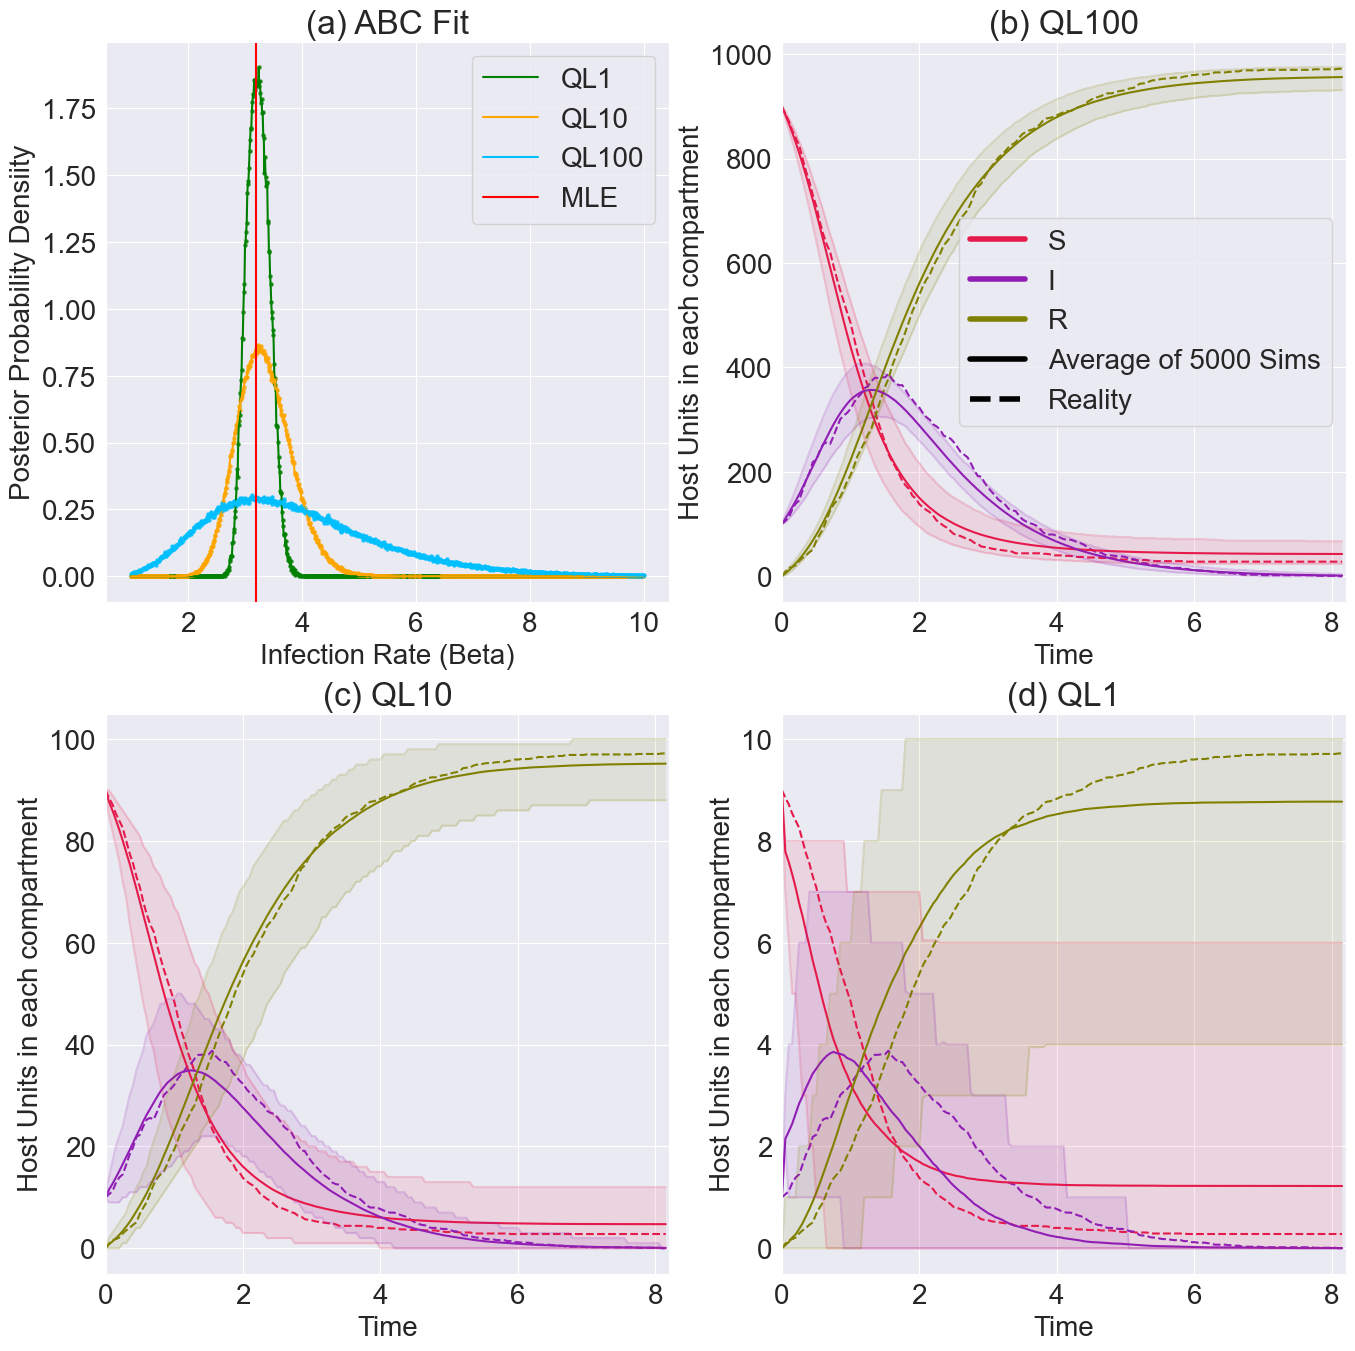

In [61]:
#Plot Graph!!!!
fig, ax0 = plt.subplots(figsize=(16, 16), nrows=2,ncols=2)
ax0=ax0.flatten()
#Prepare Data for graphing
font = {'size': 20}
plt.rc('font', **font)
colours = ['green','orange',"deepskyblue"]#
ax0[0].set_prop_cycle('color', colours)
for siz in sizes:
    if Typ == "simple":
        graph_ABC = simple_fittings[f"{siz}"]["1"]
    elif Typ == "simple_I0":
        graph_ABC = I0_fittings[f"{siz}"]["1"]
    elif Typ == "meta":
        graph_ABC = meta_fittings[f"{siz}"]["1"]
    df_ABC = pd.DataFrame(graph_ABC, columns=["Beta", "Distance"])
    threshold_schedule = threshold_scheduler(df_ABC, reference)
    for i in range(len(threshold_schedule)):
        thresh = ABC_rejection(threshold_schedule[i], graph_ABC)
        ploted = pd.DataFrame(thresh, columns=["Beta", "Counts"])
        bet_dis = ploted.groupby("Beta").count()
        plot_bet_dis = bet_dis.reset_index()
        if np.round(min(plot_bet_dis["Beta"]),2) > 1:
            mins = np.arange(1,np.round(min(plot_bet_dis["Beta"]),2),0.01)
            df_mins =pd.DataFrame({"Beta": mins, "Counts": [0]*len(mins)})
            plot_bet_dis = pd.concat([plot_bet_dis,df_mins])
        if np.round(max(plot_bet_dis["Beta"]),2) < 10:
            maxs = np.arange(np.round(max(plot_bet_dis["Beta"]),2),10,0.01)
            df_maxs =pd.DataFrame({"Beta": maxs, "Counts": [0]*len(maxs)})
            plot_bet_dis = pd.concat([plot_bet_dis,df_maxs])

        plot_bet_dis = plot_bet_dis.sort_values("Beta",ascending=True)
        print(plot_bet_dis)
        max_scale = max(plot_bet_dis["Counts"])
        plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / max_scale
        area = np.trapz(plot_bet_dis["Counts"],dx=0.01)
        plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / area
        spline = sp.interpolate.CubicSpline(plot_bet_dis["Beta"], plot_bet_dis["Counts"])
        ax0[0].scatter(plot_bet_dis["Beta"], plot_bet_dis["Counts"],
                        alpha=0.75,s=5)
        ax0[0].plot(plot_bet_dis["Beta"], spline(plot_bet_dis["Beta"]), label=f"QL{int(1000/int(siz))}")
if Typ == "simple":
    mles = np.genfromtxt("../../../Data/R0_3/Fitted/MLE_b_3.csv")[0]
elif Typ == "simple_I0":
    mles = np.genfromtxt("../../../Data/R0_3/Fitted/MLE_b_I0_1_3.csv")[0]
elif Typ == "meta":
    mles = np.genfromtxt("../../../Data/R0_5/Fitted/MLE_meta_b.csv")
ax0[0].set_ylabel("Posterior Probability Densiity")
ax0[0].set_xlabel("Infection Rate (Beta)")
ax0[0].set_title(f'(a) ABC Fit')
ax0[0].axvline(mles, color="red",label="MLE")
ax0[0].legend(bbox_to_anchor=(1, 1))

colours = ['#e6194b','#911eb4',"#808000"]

for i in range(1,4):
    ax0[i].set_prop_cycle('color', colours)
    times = np.arange(0,tmax,0.05)
    run_times = np.arange(0,tmax,tstep)
    factor = 1000 / int(sizes[i-1])
    ax0[i].plot(run_times, np.array(reality_1)/factor, linestyle = "--")
    ax0[i].plot(times,np.array(plot_dict["Runs"][i-1])[0:len(times),0], alpha = 1, label = "S")
    ax0[i].plot(times,np.array(plot_dict["Runs"][i-1])[0:len(times),1], alpha = 1, label = "I")
    ax0[i].plot(times,np.array(plot_dict["Runs"][i-1])[0:len(times),2], alpha = 1, label = "R")

    ax0[i].plot(times,np.array(lower_dict["Runs"][i-1])[0:len(times),0], alpha = 0.2)
    ax0[i].plot(times,np.array(lower_dict["Runs"][i-1])[0:len(times),1], alpha = 0.2)
    ax0[i].plot(times,np.array(lower_dict["Runs"][i-1])[0:len(times),2], alpha = 0.2)

    ax0[i].plot(times,np.array(upper_dict["Runs"][i-1])[0:len(times),0], alpha = 0.2)
    ax0[i].plot(times,np.array(upper_dict["Runs"][i-1])[0:len(times),1], alpha = 0.2)
    ax0[i].plot(times,np.array(upper_dict["Runs"][i-1])[0:len(times),2], alpha = 0.2)

    ax0[i].fill_between(times,np.array(lower_dict["Runs"][i-1])[0:len(times),0],np.array(upper_dict["Runs"][i-1])[0:len(times),0],alpha=0.1)
    ax0[i].fill_between(times,np.array(lower_dict["Runs"][i-1])[0:len(times),1],np.array(upper_dict["Runs"][i-1])[0:len(times),1],alpha=0.1)
    ax0[i].fill_between(times,np.array(lower_dict["Runs"][i-1])[0:len(times),2],np.array(upper_dict["Runs"][i-1])[0:len(times),2],alpha=0.1)

    ax0[i].set_xlabel("Time")
    ax0[i].set_ylabel("Host Units in each compartment")
    ax0[i].set_xlim(0,tmax)
    ax0[i].set_title(f'{["(b)","(c)","(d)"][i-1]} QL{[100,10,1][i-1]}')
legend_elements = [Line2D([0], [0], color='#e6194b', lw=4, label='S'),Line2D([0], [0], color='#911eb4',lw=4, label='I'),Line2D([0], [0], color='#808000', lw=4, label='R'),Line2D([0], [0], color='black',lw=4, label='Average of 5000 Sims'), Line2D([0], [0], color='black',linestyle="--",lw=4, label='Reality')]
ax0[1].legend(handles=legend_elements)
fig.show()